## Import Packages

In [1]:
from torch import *
from torchvision import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as ply

## Load Pre-Trained Model

In [2]:
alex = models.alexnet(pretrained=True)
alex = alex.cuda()
alex.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Load Image

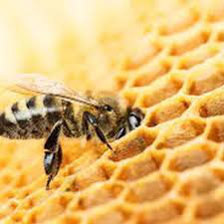

In [28]:
path = './images/bee.jpg'
im = Image.open(path)
im.resize((224,224))

## Define Occlusion function

In [29]:
def occlude(image):
    occluded= [[]]
    box = np.random.randn(16,16,3)
    box[:,:,0] = 0.485
    box[:,:,1] = 0.456
    box[:,:,2] = 0.406
    box = np.float32(box)
    for i in range(14):
        occluded.append([])
        for j in range(14):
            temp = image.copy()
            temp = np.array(temp)/255
            temp[(i)*16:(i+1)*16,(j)*16:(j+1)*16,:] = box
            occluded[i].append(temp)
    return occluded
occluded = occlude(im)

In [30]:
norm = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

## 

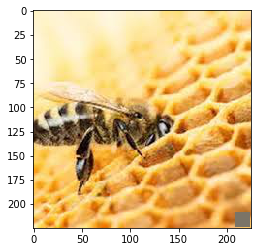

In [37]:
values = []
for i in range(14):
    values.append([])
    for j in range(14):
        plt.imshow(occluded[i][j])
        values[i].append(torch.nn.Softmax(dim = 1)(alex(norm(occluded[i][j]).unsqueeze(0).cuda().type(torch.cuda.FloatTensor)))[0][599].item())

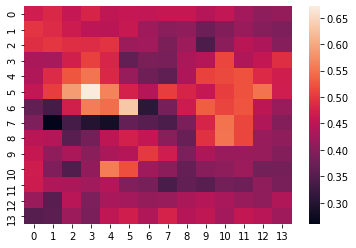

In [36]:
ax = sns.heatmap(values)
ply.show()